# Keras Simple autopilot Demo RObot!

In [6]:
# needed for matplotlib in jupyter notebook
%matplotlib inline

# import required modules
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import pandas as pd
import os
from ipyfilechooser import FileChooser


In [7]:
fc = FileChooser()
display(fc)

FileChooser(path='/home/daan/bitofpepper/ai_robot_new/ai_robot/notebooks', filename='', title='', show_hidden=…

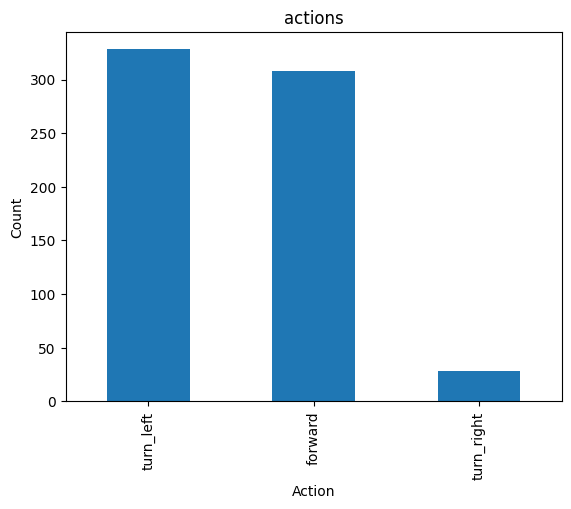

In [14]:
# prepare data
data = pd.read_csv(fc.selected)
data.shape
label_movement = data.columns[0]
data = data[data[label_movement] != 'all_stop']
data = data[data[label_movement] != 'backward']
data = data[data[label_movement] != 'ping']

data_forward_length =  data[data[label_movement] == 'forward'].shape[0]
data_random_forward = data[data[label_movement] == 'forward'].sample(n=int(data_forward_length*0.9))
data.drop(data_random_forward.index,inplace=True)
data[label_movement].value_counts().plot(kind='bar')
plt.title('actions')
plt.xlabel('Action')
plt.ylabel('Count')

image_size = 64

data = data.sample(frac=1).reset_index(drop=True)



In [15]:
# split into training and test data (10% test data)
data_test = data.sample(n=int(data.shape[0]/10))
data.drop(data_test.index,inplace=True)

#labels

conv_labels = [0 if values == 'forward' else values for values in data[label_movement] ]
conv_labels = [1 if values == 'turn_left' else values for values in conv_labels ]
conv_labels = [2 if values == 'turn_right' else values for values in conv_labels ]

labels = conv_labels

#labels test 
conv_labels = [0 if values == 'forward' else values for values in data_test[label_movement] ]
conv_labels = [1 if values == 'turn_left' else values for values in conv_labels ]
conv_labels = [2 if values == 'turn_right' else values for values in conv_labels ]

labels_test = conv_labels
print(len(labels_test))
print(len(labels))

66
598


(598, 64, 64, 3)
(66, 64, 64, 3)


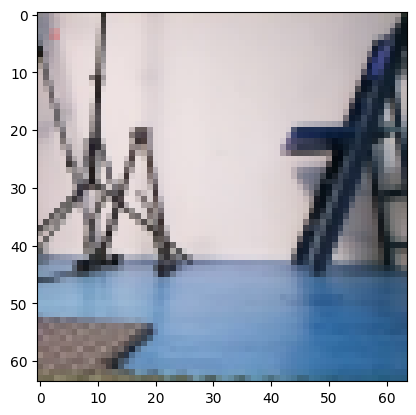

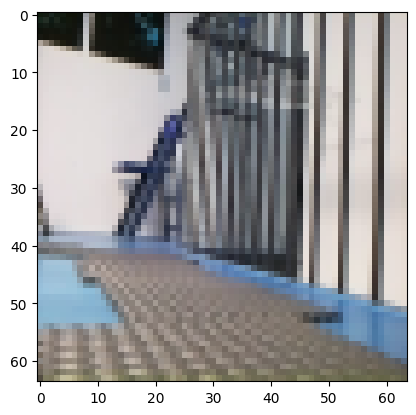

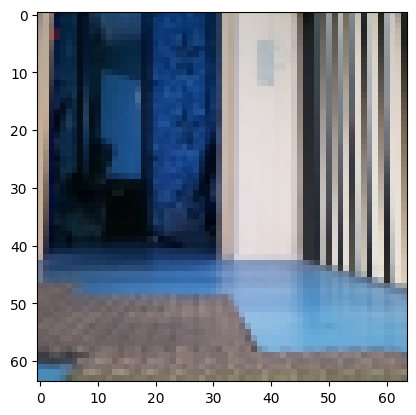

In [16]:
# convert image data
train = data.drop([ label_movement],axis=1).values
test = data_test.drop([label_movement],axis=1).values

train = train.reshape(train.shape[0],image_size,image_size,3)
test = test.reshape(test.shape[0],image_size,image_size,3)
print(train.shape)
print(test.shape)
for i in range(0,3):
    plt.imshow(train[i])
    plt.show()

## Data preparation

In [17]:
# create a train and test set

x_train = train.astype('float32') / 255
x_test = test.astype('float32') / 255

# convert classes to one-hot encoding
num_classes = 3
y_train = keras.utils.to_categorical(labels, num_classes)
y_test = keras.utils.to_categorical(labels_test, num_classes)
print("one-hot labels:\n", y_train[:3])


one-hot labels:
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## Training

In [18]:
# create model
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(image_size, image_size, 3)),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 30, 30, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 115200)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               14745728  
                                                      

In [19]:
# fit model to training data
model.fit(x_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
15/15 [==============================] - 5s 307ms/step - loss: 2.6368 - accuracy: 0.4686 - val_loss: 0.7614 - val_accuracy: 0.5333
Epoch 2/10
15/15 [==============================] - 4s 292ms/step - loss: 0.6724 - accuracy: 0.6862 - val_loss: 0.4363 - val_accuracy: 0.8500
Epoch 3/10
15/15 [==============================] - 4s 292ms/step - loss: 0.3205 - accuracy: 0.8828 - val_loss: 0.3525 - val_accuracy: 0.8000
Epoch 4/10
15/15 [==============================] - 4s 294ms/step - loss: 0.1934 - accuracy: 0.9456 - val_loss: 0.1873 - val_accuracy: 0.9417
Epoch 5/10
15/15 [==============================] - 4s 294ms/step - loss: 0.1138 - accuracy: 0.9707 - val_loss: 0.1422 - val_accuracy: 0.9667
Epoch 6/10
15/15 [==============================] - 4s 297ms/step - loss: 0.1805 - accuracy: 0.9351 - val_loss: 0.3266 - val_accuracy: 0.8500
Epoch 7/10
15/15 [==============================] - 4s 300ms/step - loss: 0.1163 - accuracy: 0.9561 - val_loss: 0.1611 - val_accuracy: 0.9250
Epoch 

## Evaluation

In [20]:
# evaluate model
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score)

3/3 [==============================] - 0s 34ms/step - loss: 0.1688 - accuracy: 0.9394
Test accuracy: [0.16875606775283813, 0.939393937587738]


In [21]:
model.save(os.path.join('..', 'models', 'robot_model.keras'))


In [30]:
pred = model.predict(x_train[0:1000])
print(pred.argmax(axis=-1))


19/19 [==============================] - 1s 49ms/step
[1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 2 0 1 2 0 0 1 0 1 1 1 1 0 0 2
 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 2 0 0 0 0 1 0 2 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 2 1 0 1 0
 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 2 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 2 2 1 0 0 1 0 0 1 1 2 0 1 0 0 1 0
 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 2
 0 0 2 1 0 1 1 1 1 2 1 1 1 1 1 1 1 2 0 0 1 0 0 0 0 0 1 2 0 1 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 0 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 2
 0 1 2 0 2 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 2 0 0 0 2 1 2 0 0 1 0 0 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 2